In [1]:
import pandas as pd
import timeseries_viz as tsv
import altair as alt

from azure.storage.blob import BlobServiceClient
import os
from storefact import get_store_from_url, get_store
import io

In [2]:
account_url=os.environ['STRATOSPHERE_JUPYTER_STORAGE_ACCOUNT_URL']
tenant=get_store_from_url(account_url)

In [3]:
def read_parquet_file(fname , storename):
    df=pd.read_parquet(io.BytesIO(storename.get(fname)))
    return df

In [4]:
df = read_parquet_file(fname='caption_generator/calorizator.parquet.gzip',storename=tenant)

In [5]:
df.columns

Index(['food_type', 'group', 'short_name', 'links', 'name', 'serving_size',
       'serving_size_measure', 'calories', 'calories_measure', 'protein',
       'protein_measure', 'fat', 'fat_measure', 'carbohydrate',
       'carbohydrate_measure', 'image_url', 'ingredients', 'portions'],
      dtype='object')

In [6]:
df.drop_duplicates(subset='short_name',keep='first', inplace=True)

In [7]:
df.reset_index(inplace=True,drop=True)

In [8]:
df.shape

(10993, 18)

In [9]:
df.sample(5).T

5951  \
food_type                                                       product   
group                                              Кондитерские изделия   
short_name                                                      halva-2   
links                       https://calorizator.ru/product/cake/halva-2   
name                                                     Халва тахинная   
serving_size                                                              
serving_size_measure                                                      
calories                                                            516   
calories_measure                                                   ккал   
protein                                                            12.7   
protein_measure                                                       г   
fat                                                                29.9   
fat_measure                                                           г   
carbohydrate                                                       50.6   
carbohydrate_measure                                                  г   
image_url             https://calorizator.ru/sites/default/files/ima...   
ingredients                                                          []   
portions                                                                  

                                                                   7356  \
food_type                                                       recipes   
group                                                      Вторые блюда   
short_name                                                        53886   
links                              https://calorizator.ru/recipes/53886   
name                                      Жареная курица в соевом соусе   
serving_size                                                        100   
serving_size_measure                                              грамм   
calories                                                          210.2   
calories_measure                                                  ккал.   
protein                                                            14.7   
protein_measure                                                     гр.   
fat                                                                15.7   
fat_measure                                                         гр.   
carbohydrate                                                        2.5   
carbohydrate_measure                                                гр.   
image_url             https://calorizator.ru/sites/default/files/ima...   
ingredients           [{"name": "Курица", "size": "1,5", "size_measu...   
portions                                                              8   

                                                                   5600  \
food_type                                                       product   
group                                              Кондитерские изделия   
short_name                                                      dough-8   
links                       https://calorizator.ru/product/cake/dough-8   
name                                                       Тесто кадаиф   
serving_size                                                              
serving_size_measure                                                      
calories                                                            234   
calories_measure                                                   ккал   
protein                                                             7.9   
protein_measure                                                       г   
fat                                                                 1.4   
fat_measure                                                           г   
carbohydrate                                                       50.6   
carbohydrate_measure                                                  г   
image_url      

In [10]:
import requests
from PIL import Image
import matplotlib.pylab as plt

#url = "https://example.com/image.jpg"
def check_food_id(df,id):
    url = df.iloc[id]['image_url']
    caption = df.iloc[id]['name']
    print(url)
    response = requests.get(url)

    with open("image.jpg", "wb") as f:
        f.write(response.content)
        im = Image.open("image.jpg")
        #im.show()
        plt.imshow(im)
        plt.title(caption)
    

In [11]:
df['calories'] = df['calories'].astype(float)

https://calorizator.ru/sites/default/files/imagecache/product_512/product/burdock-oil.jpg


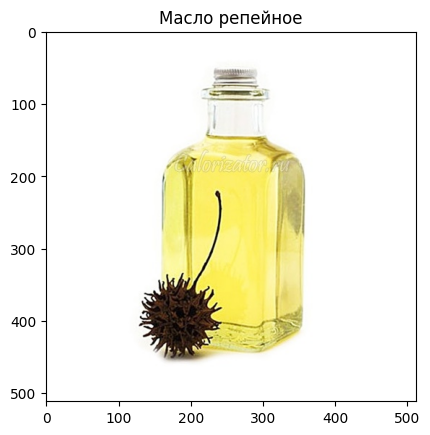

In [12]:
calories_max = df[df['food_type']=='product']['calories'].max()
#print(calories_max)
#print(df[df['calories']==calories_max]['name'])
max_prod = df[df['calories']==calories_max].index[0]
check_food_id(df,id=max_prod)

https://calorizator.ru/sites/default/files/imagecache/recipes_full/recipes/15038.jpg


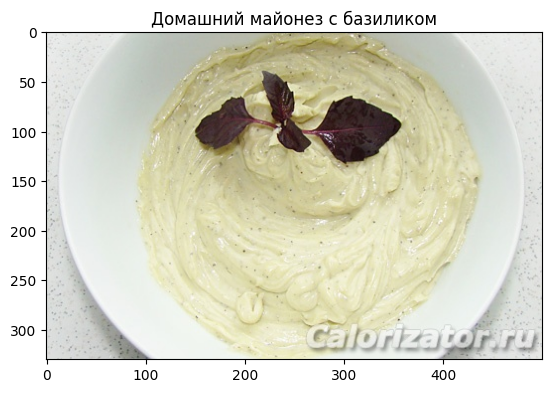

In [13]:
calories_max = df[df['food_type']=='recipes']['calories'].max()
max_prod = df[(df['food_type']=='recipes') & (df['calories']==calories_max)].index[0]
check_food_id(df,id=max_prod)

424.2
https://calorizator.ru/sites/default/files/imagecache/recipes_full/recipes/84951.jpg


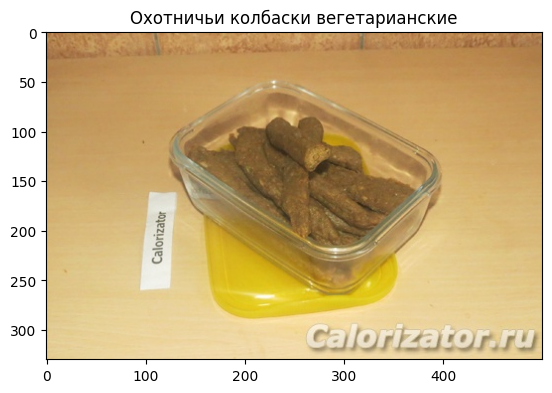

In [14]:
calories_max = df[(df['food_type']=='recipes') & (df['group']=='Вторые блюда')]['calories'].max()
print(calories_max)
max_prod = df[(df['food_type']=='recipes') & (df['calories']==calories_max)].index[0]
check_food_id(df,id=max_prod)

365.5
10207    Сырный салат с морковью
Name: name, dtype: object
https://calorizator.ru/sites/default/files/imagecache/recipes_full/recipes/35394.jpg


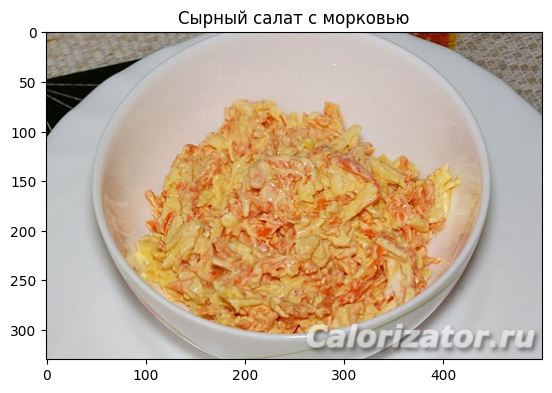

In [15]:
calories_max = df[(df['food_type']=='recipes') & (df['group']=='Салаты')]['calories'].max()
print(calories_max)
print(df[df['calories']==calories_max]['name'])
max_prod = df[(df['food_type']=='recipes') & (df['calories']==calories_max)].index[0]
check_food_id(df,id=max_prod)

493.6
https://calorizator.ru/sites/default/files/imagecache/recipes_full/recipes/25282.jpg


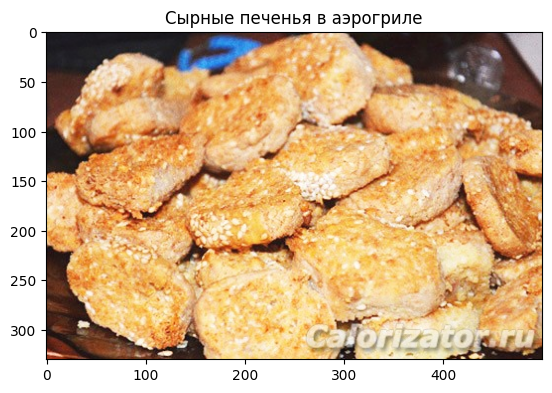

In [16]:
calories_max = df[(df['food_type']=='recipes') & (df['group']=='Выпечка')]['calories'].max()
print(calories_max)
max_prod = df[(df['food_type']=='recipes') & (df['calories']==calories_max)].index[0]
check_food_id(df,id=max_prod)

In [17]:
tsv.plot_category_counts(df,category='food_type',category_label='Food Type',objects='links',object_label='entry count')

alt.Chart(...)

In [18]:
tsv.plot_category_counts(df[df['food_type']=='recipes'],category='group',category_label='Group',objects='links',object_label='entry count')

alt.Chart(...)

In [19]:
tsv.plot_category_counts(df[df['food_type']=='product'],category='group',category_label='Group',objects='links',object_label='entry count')

alt.Chart(...)

In [20]:
tsv.plot_category_counts(df,category='serving_size',category_label='Serving Size',objects='links',object_label='entry count')

alt.Chart(...)

# Analysis of clusters in Main Dish category

In [21]:
df_maindish = df[(df['food_type']=='recipes') & (df['group']=='Вторые блюда')]
df_maindish.reset_index(inplace=True)
df_maindish.sample(3)

index food_type         group short_name  \
89    7180   recipes  Вторые блюда      99335   
534   8245   recipes  Вторые блюда      80630   
169   7473   recipes  Вторые блюда      36393   

                                    links  \
89   https://calorizator.ru/recipes/99335   
534  https://calorizator.ru/recipes/80630   
169  https://calorizator.ru/recipes/36393   

                                       name serving_size serving_size_measure  \
89               Греча с мясом на сковороде          100                грамм   
534                      Лодочки из цуккини          100                грамм   
169  Запеченный картофель с яйцом и овощами          100                грамм   

     calories calories_measure protein protein_measure   fat fat_measure  \
89      143.7            ккал.     8.1             гр.   7.2         гр.   
534      58.1            ккал.     1.7             гр.   4.1         гр.   
169     166.5            ккал.     8.2             гр.  11.2         гр.   

    carbohydrate carbohydrate_measure  \
89          11.9                  гр.   
534            4                  гр.   
169          8.5                  гр.   

                                             image_url  \
89   https://calorizator.ru/sites/default/files/ima...   
534  https://calorizator.ru/sites/default/files/ima...   
169  https://calorizator.ru/sites/default/files/ima...   

                                           ingredients portions  
89   [{"name": "Греча", "size": "200", "size_measur...        4  
534  [{"name": "Цуккини", "size": "250", "size_meas...        2  
169  [{"name": "Картофель (крупный)", "size": "6", ...        6

In [22]:
df_maindish.shape

(1138, 19)

## Clean and tokenize data

In [23]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
from string import punctuation

import nltk
nltk.download('popular')
#nltk.download() #to print all options

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /tmp/workspace/nltk_data...
[nltk_data]    |   Package movie_reviews is a

True

In [24]:
def remove_noise(text, stop_words = russian_stopwords):
    tokens = word_tokenize(text.lower(),language='russian')
    tokens = [token for token in tokens if token not in russian_stopwords and token not in punctuation]
    return tokens

In [25]:
remove_noise("Какая классная погода сегодня!")

['классная', 'погода', 'сегодня']

In [26]:
remove_noise(df_maindish['name'][0])

['а-ля', 'рататуй']

## Determine the importance of the terms in a document (in TF-IDF matrix)

See [tutorial on scikit-learn](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

### ToDo: try the same with ingredients

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
#if word appears in max_df it should be ignored
#if word appears in min_df it should be ignored
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=1000, min_df=0.0, tokenizer=remove_noise)

t0 = time()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_maindish['name'])
print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {tfidf_matrix.shape[0]}, n_features: {tfidf_matrix.shape[1]}")

vectorization done in 0.076 s
n_samples: 1138, n_features: 869


In [28]:
num_clusters = 100

## Cluster the TF-IDF matrix with k-means

In [29]:
from scipy.cluster.vq import kmeans, vq

In [30]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

### Print top words for each cluster

In [31]:
terms = tfidf_vectorizer.get_feature_names_out()
clust_dict = {}
for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    clust_dict[i] = sorted_terms[:5]

In [32]:
df_maindish['cluster_labels'], _ = vq(tfidf_matrix.todense(), cluster_centers)
df_maindish['top_words_cluster'] = df_maindish['cluster_labels'].apply(lambda x: clust_dict[x])

In [33]:
df_maindish[['name','cluster_labels','top_words_cluster']].sample(10)

name  cluster_labels  \
1127                      Яичница с гренками              78   
541         Макароны запеченные с баклажаном               5   
1030                         Утка с яблоками              63   
1133                Яичные маффины с овощами              43   
584                   Мультизлаковые котлеты              46   
177                       Индейка в горшочке              43   
43    Булгур с куриными сердечками в духовке              10   
1069      Хек с овощами под горчичным соусом              62   
1041      Фаршированный запеченный картофель              99   
503                    Кыстыбый с картофелем               0   

                                      top_words_cluster  
1127     [яичница, авокадо, помидорах, гренками, сыром]  
541   [запеченные, макароны, духовке, сыром, морковные]  
1030  [утка, по-деревенски, фаршированная, яблоками,...  
1133          [овощами, индейка, пирог, минтай, томате]  
584                 [мультизлаковые, котлеты, 14, 2, 5]  
177           [овощами, индейка, пирог, минтай, томате]  
43           [духовке, овощами, курицей, гречка, омлет]  
1069   [хек, соусом, овощами, кисло-сладком, горчичным]  
1041   [запеченный, картофель, батат, овощами, грибным]  
503   [картофелем, по-французски, курица, духовке, к...

In [34]:
df_agg = df_maindish.groupby(['cluster_labels']).agg({'name':'nunique','calories':['mean','std']}).reset_index()
df_agg[('calories','rel,%')] = round(100.*df_agg[('calories','std')]/df_agg[('calories','mean')],2)
df_agg['top_words_cluster'] = df_agg['cluster_labels'].apply(lambda x: clust_dict[x])
df_agg[('calories','rel,%')] = df_agg[('calories','rel,%')].fillna(0)

In [35]:
print("Number of clusters with 1 name:",len(df_agg[df_agg[('name','nunique')]==1]), ", which is",round(100.*len(df_agg[df_agg[('name','nunique')]==1])/len(df_agg),2),"%")

Number of clusters with 1 name: 9 , which is 9.0 %


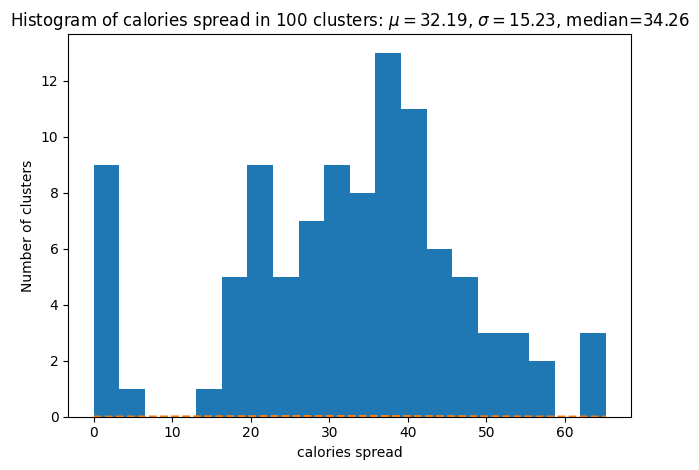

In [36]:
import matplotlib.pyplot as plt
import numpy as np
num_bins = 20

sigma = round(df_agg[('calories','rel,%')].std(),2)
mu = round(df_agg[('calories','rel,%')].mean(),2)
median = round(df_agg[('calories','rel,%')].median(),2)
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(df_agg[('calories','rel,%')], num_bins, density=False)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('calories spread')
ax.set_ylabel('Number of clusters')
ax.set_title(f'Histogram of calories spread in {num_clusters} clusters: $\mu={mu}$, $\sigma={sigma}$, median={median}')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [37]:
# import seaborn as sbr
# sbr.histplot(df_agg,x=('calories','rel,%'))

In [38]:
df_maindish[df_maindish['cluster_labels']==0][['name','calories']]

name  calories
69                           Говядина по-французски     163.8
424            Куриные бедра с картофелем в духовке      98.7
442           Куриные крылья с картофелем в духовке     108.2
490                   Курица с картофелем в духовке     123.1
491               Курица с картофелем по-французски     140.3
497                  Курица с яблоками и картофелем     147.3
503                           Кыстыбый с картофелем     143.0
590   Мясной рулетик из свинины с картофелем внутри     193.3
602    Мясо по-французски из карбонада с картофелем     142.2
603           Мясо по-французски из постной свинины     259.2
880            Свиная рулька с фасолью и картофелем     143.0
890                           Свинина по-французски     206.4
938                        Сом с молодым картофелем     105.3
992                 Тортилья с картофелем и грибами     144.5
1012               Тушеные куриные шеи с картофелем     123.7
1104                Шампиньоны жареные с картофелем      88.6

In [39]:
df_maindish[df_maindish['cluster_labels']==1][['name','calories']]

name  calories
48                             Быстрый тофу      80.3
626                Овощи в кокосовом молоке      67.5
627                 Овощи в сметанном соусе      58.7
629                Овощи запеченные с фетой      80.2
630                          Овощи на гриле      76.1
631             Овощи по-китайски с брынзой     142.6
633                 Овощи с сыром и орехами      86.7
634                      Овощи с сыром Тофу      82.6
635  Овощи с фасолью тушеные в соевом соусе      53.2
636              Овощи тушеные с тофу сыром      75.0
637           Овощи, запеченные со специями      94.5
690                   Открытый пирог с тофу     162.4
731                           Печеные овощи      73.3
959                        Стир-фрай с тофу      96.3
994                           Тофу наггетсы     101.4
995                        Тофу со шпинатом      44.8